In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [2]:
csv_filepath = Path.cwd().parent / "outputs" / "s27under10000.csv"
df = pd.read_csv(csv_filepath)

df

,Score,Target,Expression
0,1,1,True
1,2,-1,-(True)
2,2,-2,~(True)
3,3,0,~(-(True))
4,3,2,-(~(True))
...,...,...,...
19996,28,-9869,(True)-(((~((True)<<(((True)-(~(True)))<<(True...
19997,28,-7895,(True)-((~(((True)-((~((~(True))<<(-((~(True))...
19998,28,-9498,(~(-(~(True))))*((~((~((True)<<((True)-((~(Tru...
19999,28,7894,(((~(((True)-(~(True)))<<(-(~(True)))))**((Tru...


In [3]:
targets_df = df.sort_values("Target")

targets_df

,Score,Target,Expression
683,15,-10000,-(((~(-((~(True))<<(True))))<<(True))**(-((~(T...
1209,16,-9999,(True)-(((~(-((~(True))<<(True))))<<(True))**(...
2237,18,-9998,-(~((True)-(((~(-((~(True))<<(True))))<<(True)...
3931,19,-9997,(True)-(~((True)-(((~(-((~(True))<<(True))))<<...
5064,20,-9996,-(((~(True))<<(True))+(((~(-((~(True))<<(True)...
...,...,...,...
4095,19,9996,((~(True))<<(True))+(((~(-((~(True))<<(True)))...
3225,19,9997,~(-(~((True)-(((~(-((~(True))<<(True))))<<(Tru...
1622,17,9998,~((True)-(((~(-((~(True))<<(True))))<<(True))*...
958,16,9999,~(-(((~(-((~(True))<<(True))))<<(True))**(-((~...


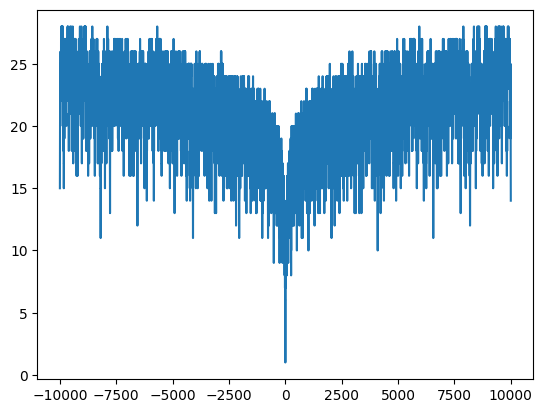

In [4]:
plt.plot(targets_df["Target"], targets_df["Score"])
plt.show()

In [36]:
def get_targets_scores(filename: str, max_abs_val: int, path: Path=None):
    if path is None:
        path = Path.cwd().parent / "outputs"

    def is_valid(value):
        try:
            num = int(value)
            return abs(num) <= max_abs_val
        except (ValueError, TypeError):
            return False

    filepath = path / filename
    csv_filepath = Path.cwd().parent / "outputs" / filename
    df = pd.read_csv(csv_filepath)
    targets = df["Target"]
    scores = df["Score"]
    valid_df = df[targets.apply(is_valid)]

    # Convert to numeric so we can sort numerically, instead of lexicographically
    numeric_df = valid_df[["Score", "Target"]].apply(pd.to_numeric)
    sorted_df = numeric_df.sort_values("Target")
    return sorted_df["Target"], sorted_df["Score"]

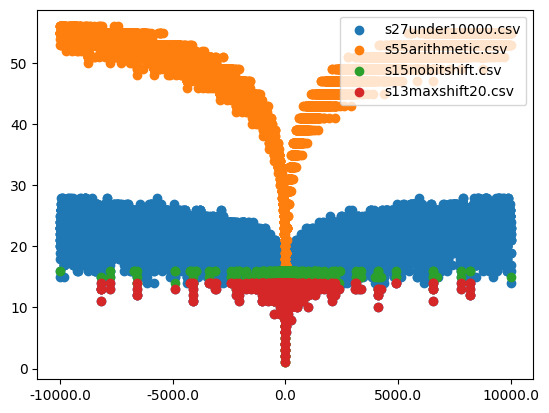

In [37]:
for filename in ["s27under10000.csv",  "s55arithmetic.csv", "s15nobitshift.csv", "s13maxshift20.csv"]:
    targets, scores = get_targets_scores(filename, 10000)
    plt.scatter(targets, scores, label=filename)
plt.legend(loc="upper right")
plt.xticks(np.linspace(-10000, 10000, 5), np.linspace(-10000, 10000, 5))
plt.show()

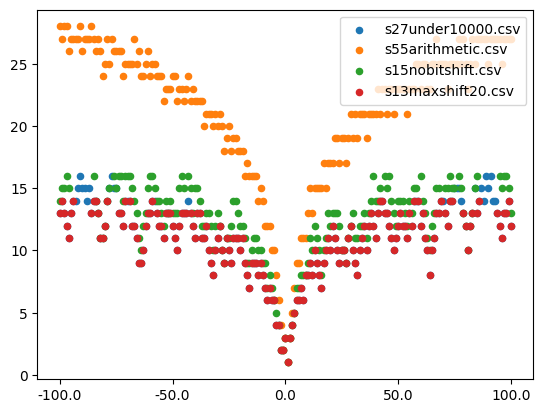

In [50]:
for filename in ["s27under10000.csv",  "s55arithmetic.csv", "s15nobitshift.csv", "s13maxshift20.csv"]:
    targets, scores = get_targets_scores(filename, 100)
    plt.scatter(targets, scores, label=filename, s=20)
plt.legend(loc="upper right")
plt.xticks(np.linspace(-100, 100, 5), np.linspace(-100, 100, 5))
plt.show()

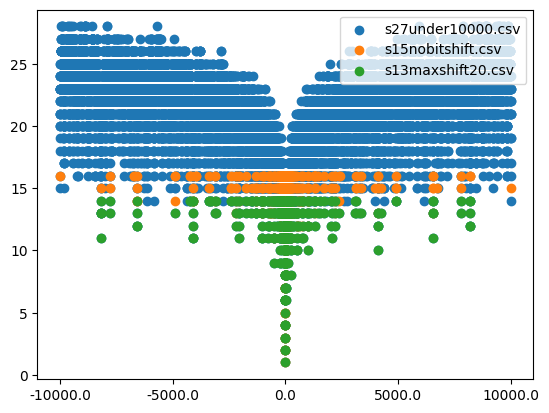

In [51]:
for filename in ["s27under10000.csv", "s15nobitshift.csv", "s13maxshift20.csv"]:
    targets, scores = get_targets_scores(filename, 10000)
    plt.scatter(targets, scores, label=filename)
plt.legend(loc="upper right")
plt.xticks(np.linspace(-10000, 10000, 5), np.linspace(-10000, 10000, 5))
plt.show()